In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import random
import seaborn as sns
from networkx.algorithms import community as com

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    labels = nx.draw_networkx_labels(G, pos,font_size = 18)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
edges = []
bound = 10
with open("Dataset\Social Network\sna.csv", "r") as f:
    for line in f:
        s = line.strip()
        a, b ,c ,d = s.split(",")
        edges.append((int(a),int(b),{"weight": int(c) + int(bound)}))

In [4]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
pos = nx.spring_layout(graph)

In [5]:
print("NODES: ", len(graph.nodes))

print("EDGES: ", len(graph.edges))

NODES:  5881
EDGES:  35592


In [6]:
graphcut = graph.to_undirected()

In [7]:
node_list = []
for node in graph.nodes:
    if graph.degree[node] >= 10:
        node_list.append(node)
print(len(node_list))

1396


In [8]:
graph2 = graphcut.subgraph(node_list).copy()

In [9]:
print("NODES: ", len(graph2.nodes))

print("EDGES: ", len(graph2.edges))

NODES:  1396
EDGES:  13104


In [44]:
# posnd = nx.spring_layout(graph)
# posd = nx.spring_layout(graphcut)
# pos10 = nx.spring_layout(graph2)

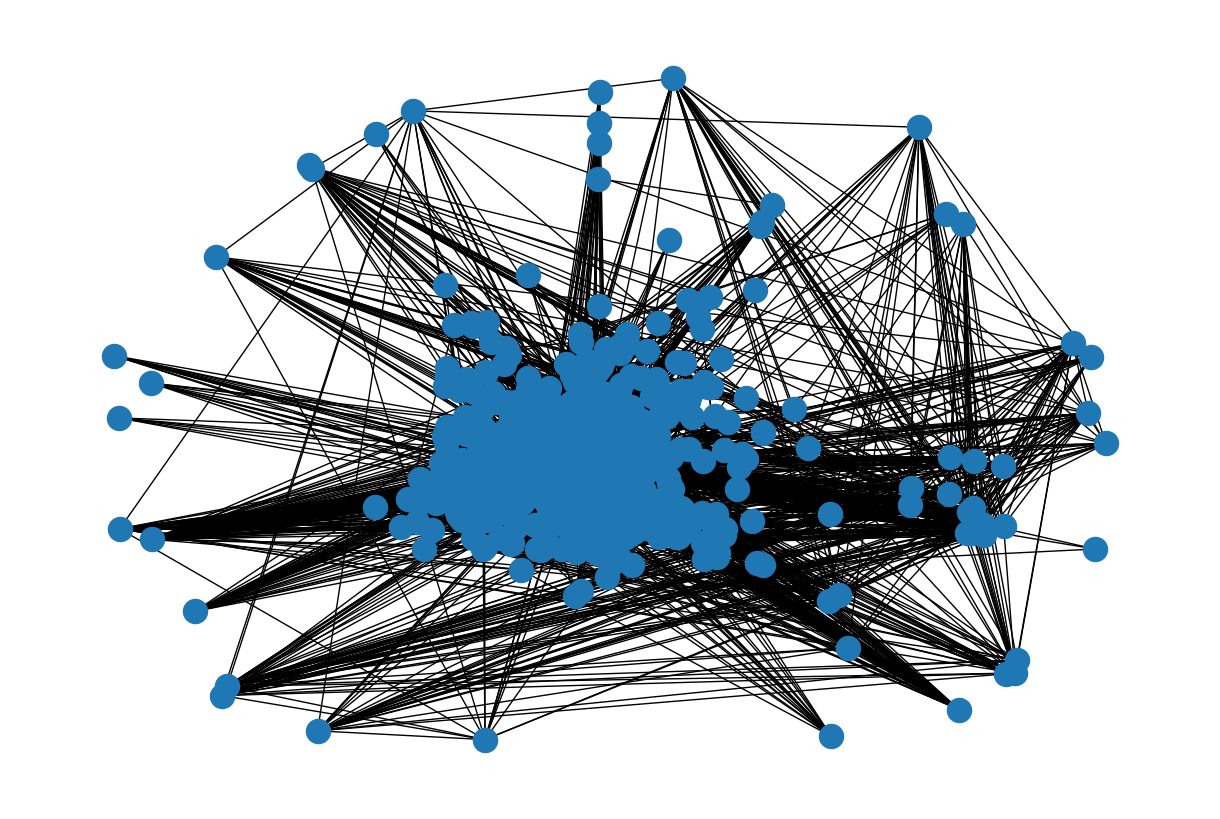

In [55]:
plt.figure(figsize=(12,8))
nx.draw(graph2,pos)
plt.show()

<AxesSubplot: ylabel='Count'>

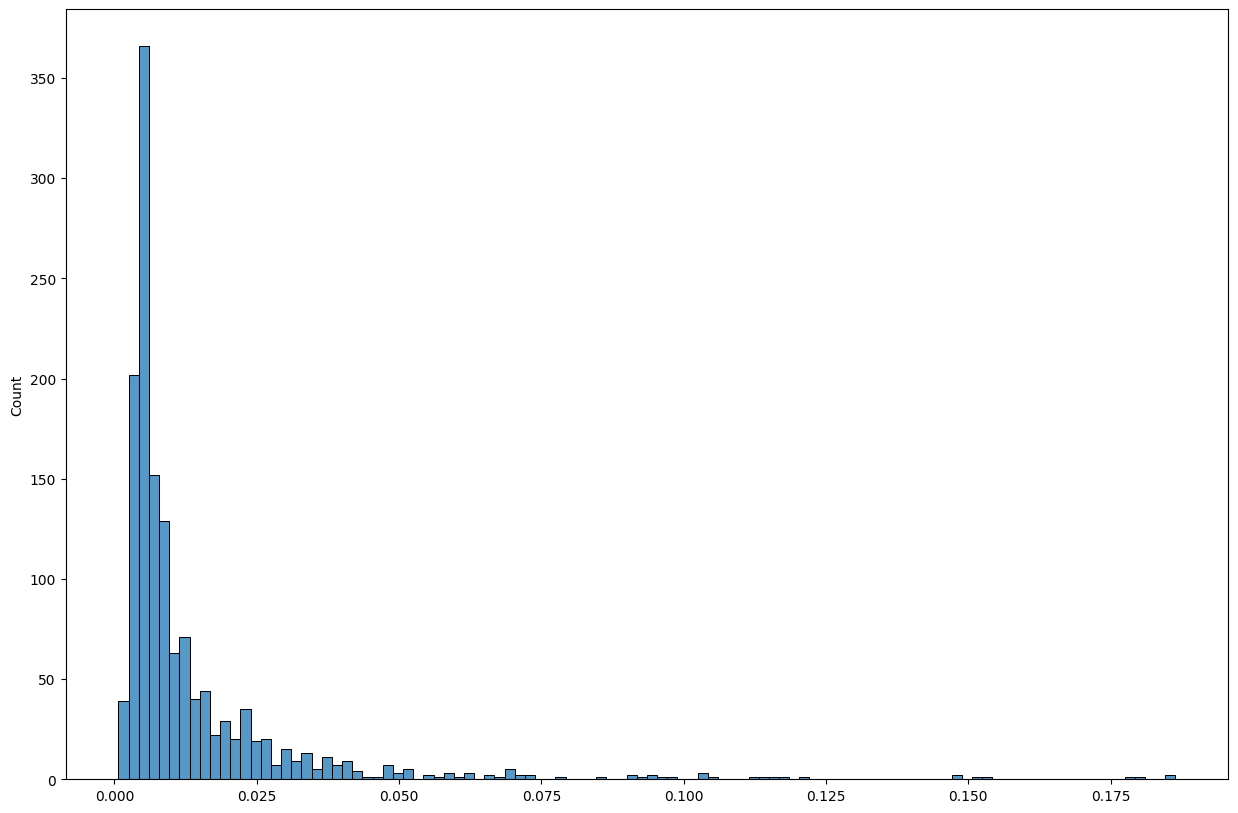

In [47]:
degree = nx.degree_centrality(graph2)
plt.figure(figsize=(15,10))
sns.histplot(list(degree.values()), kde=False)

<AxesSubplot: xlabel='Node ID', ylabel='Degree centrality'>

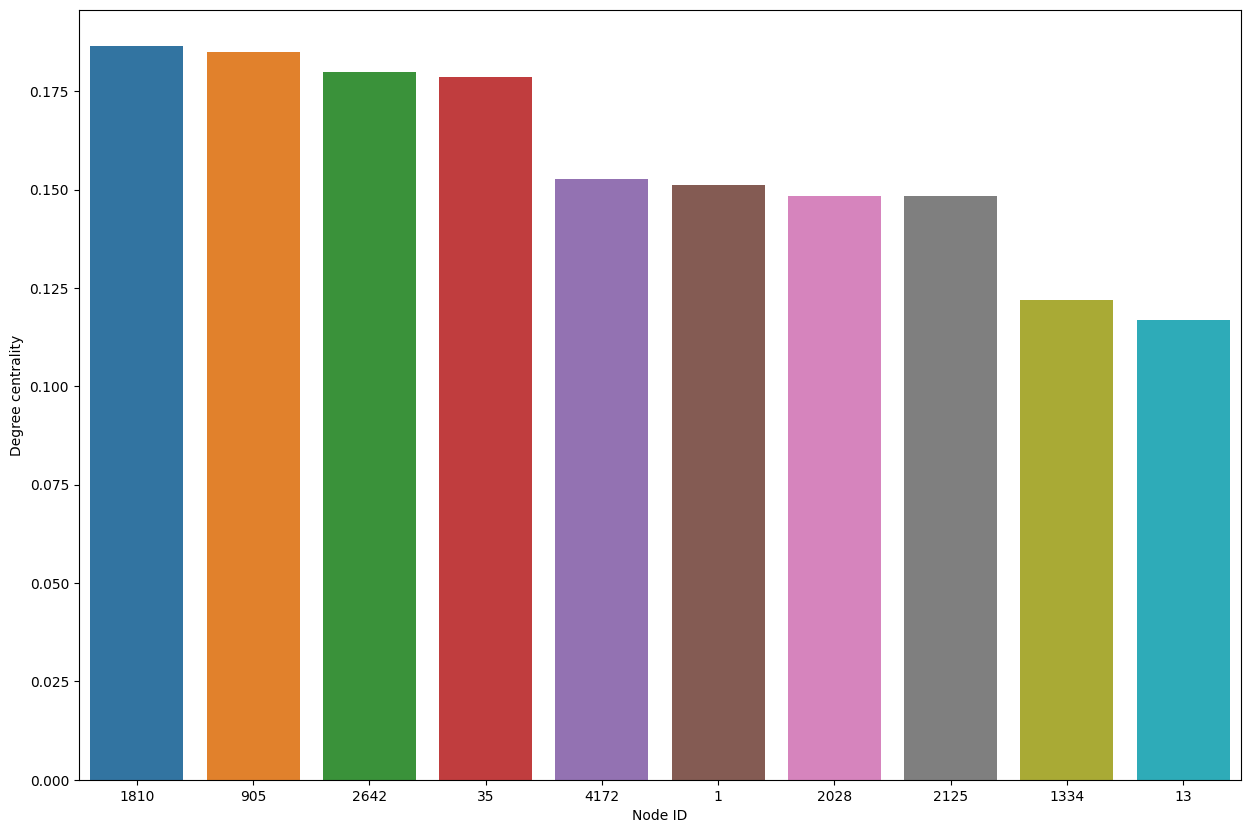

In [48]:
d = {'Node ID':list(degree.keys()),'Degree centrality':list(degree.values())}
df = pd.DataFrame(data = d)
plt.figure(figsize=(15,10))
d= df.nlargest(10, 'Degree centrality')
plot_order = d.groupby('Node ID')['Degree centrality'].sum().sort_values(ascending=False).index.values
sns.barplot(
    x='Node ID',
    y='Degree centrality',
    data=d,
    order=plot_order
)

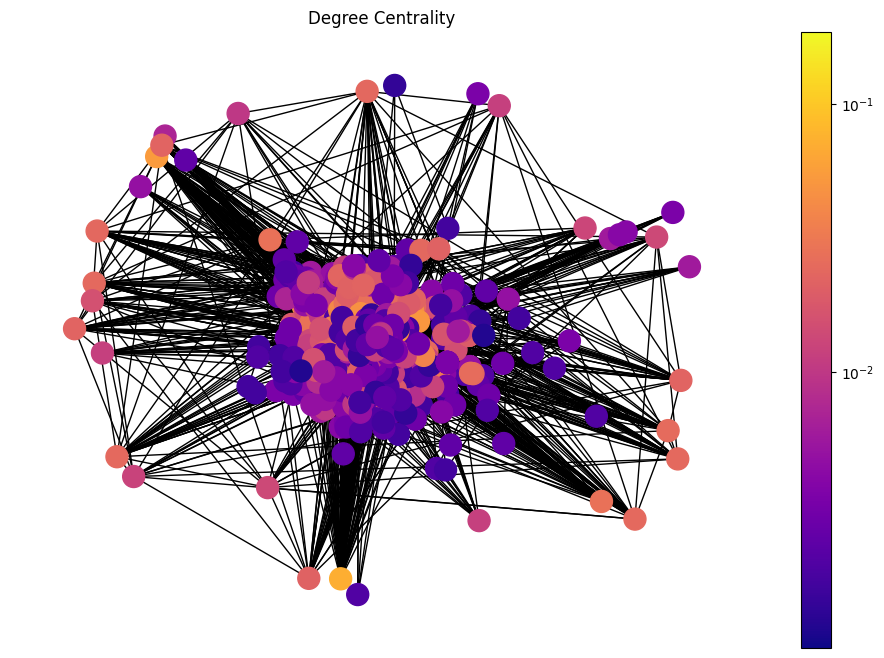

In [66]:
plt.figure(figsize=(12,8))
draw(graph2, pos, degree, 'Degree Centrality')


In [67]:
print("NODES: ", len(graph2.nodes))
print("EDGES: ", len(graph2.edges))
print("CLUSTERING: ", nx.average_clustering(graph2))

NODES:  1396
EDGES:  13104
CLUSTERING:  0.2566328353144562


<AxesSubplot: xlabel='Node ID', ylabel='Betweenness centrality'>

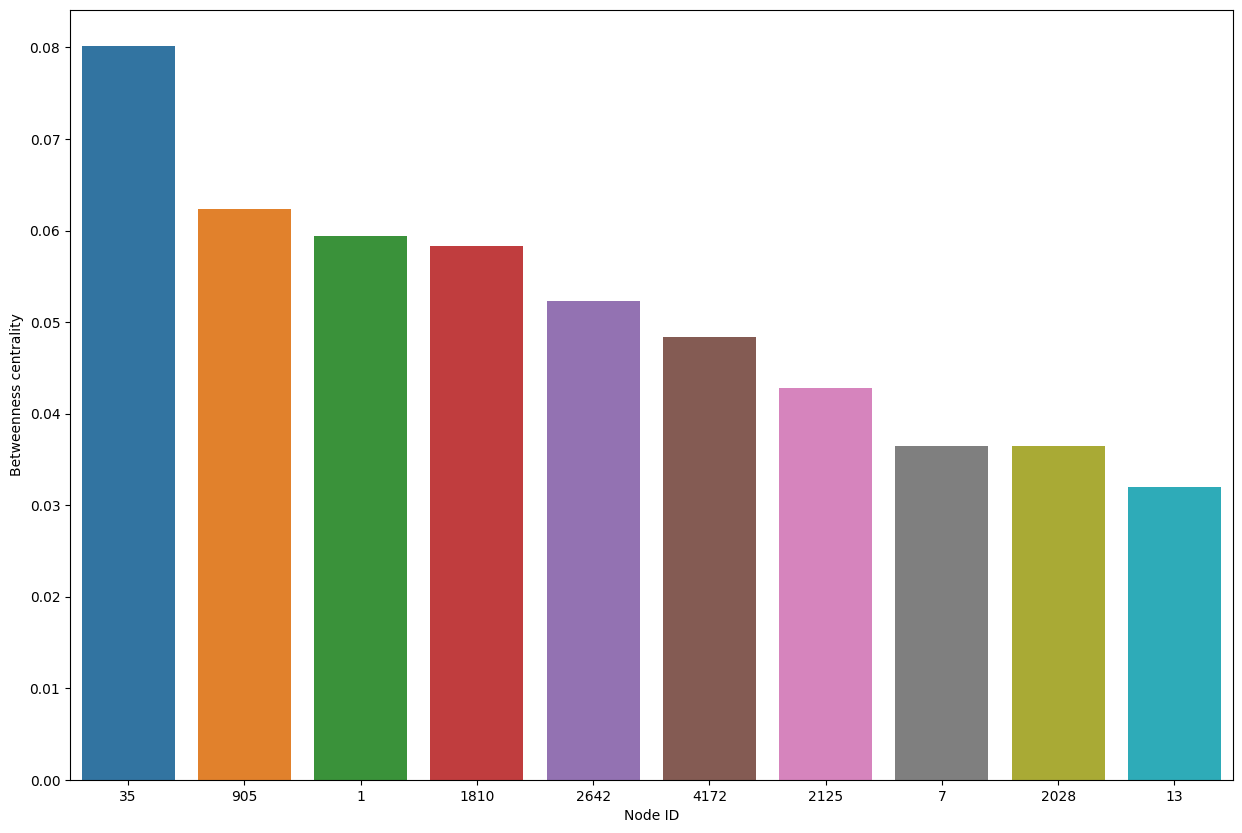

In [11]:
bet = nx.betweenness_centrality(graph2)
d = {'Node ID':list(bet.keys()),'Betweenness centrality':list(bet.values())}
df = pd.DataFrame(data = d)
plt.figure(figsize=(15,10))
d= df.nlargest(10, 'Betweenness centrality')
plot_order = d.groupby('Node ID')['Betweenness centrality'].sum().sort_values(ascending=False).index.values
sns.barplot(
    x='Node ID',
    y='Betweenness centrality',
    data=d,
    order=plot_order
)

<AxesSubplot: ylabel='Count'>

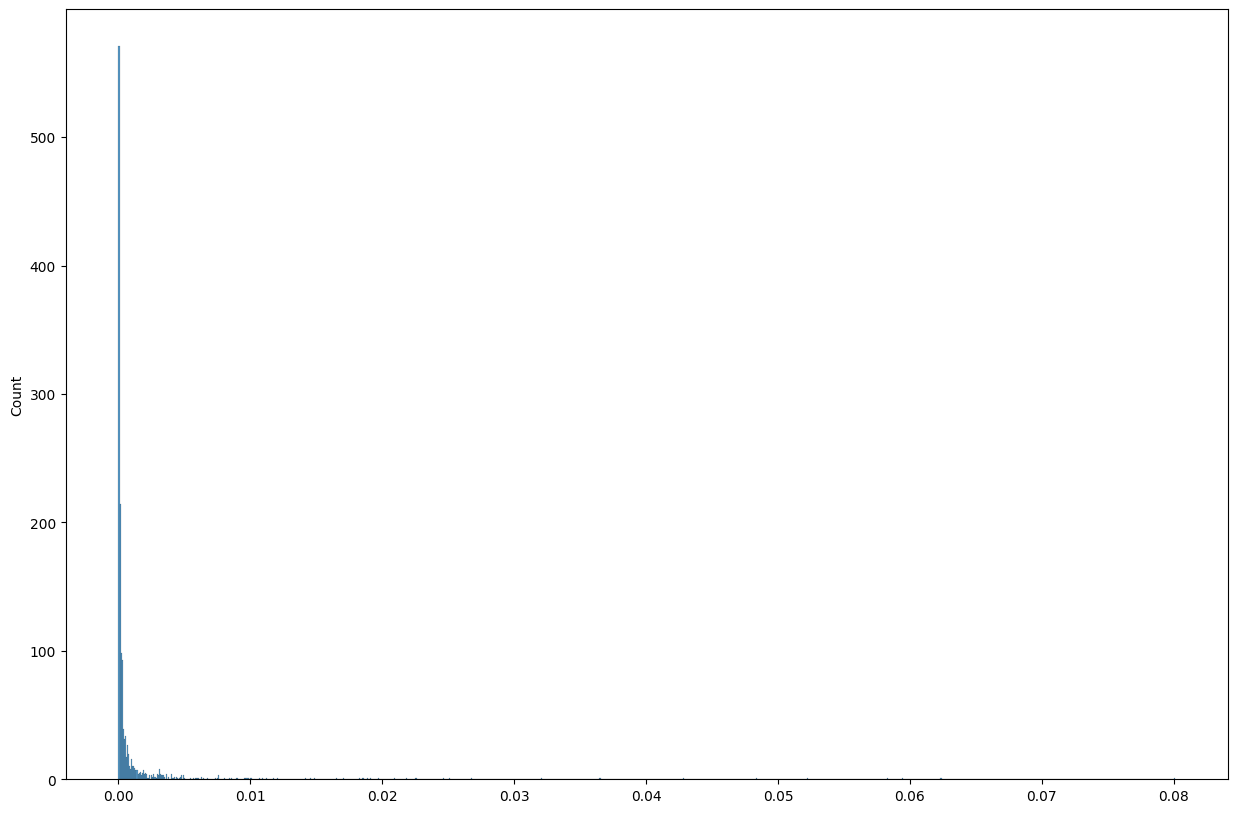

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(list(bet.values()), kde=False)

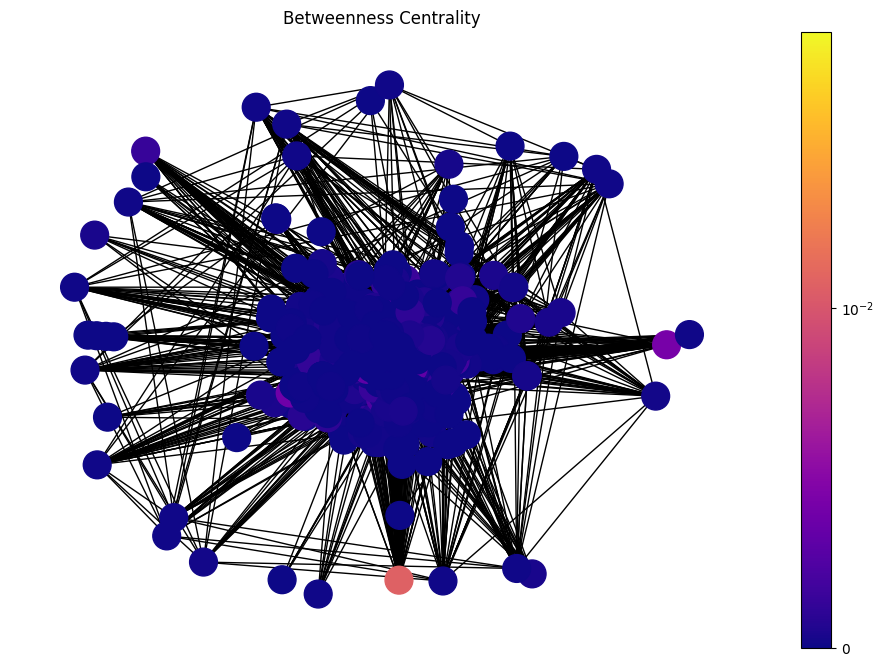

In [26]:
plt.figure(figsize=(12,8))
draw(graph2, pos, bet, 'Betweenness Centrality')

<AxesSubplot: xlabel='Node ID', ylabel='Closeness centrality'>

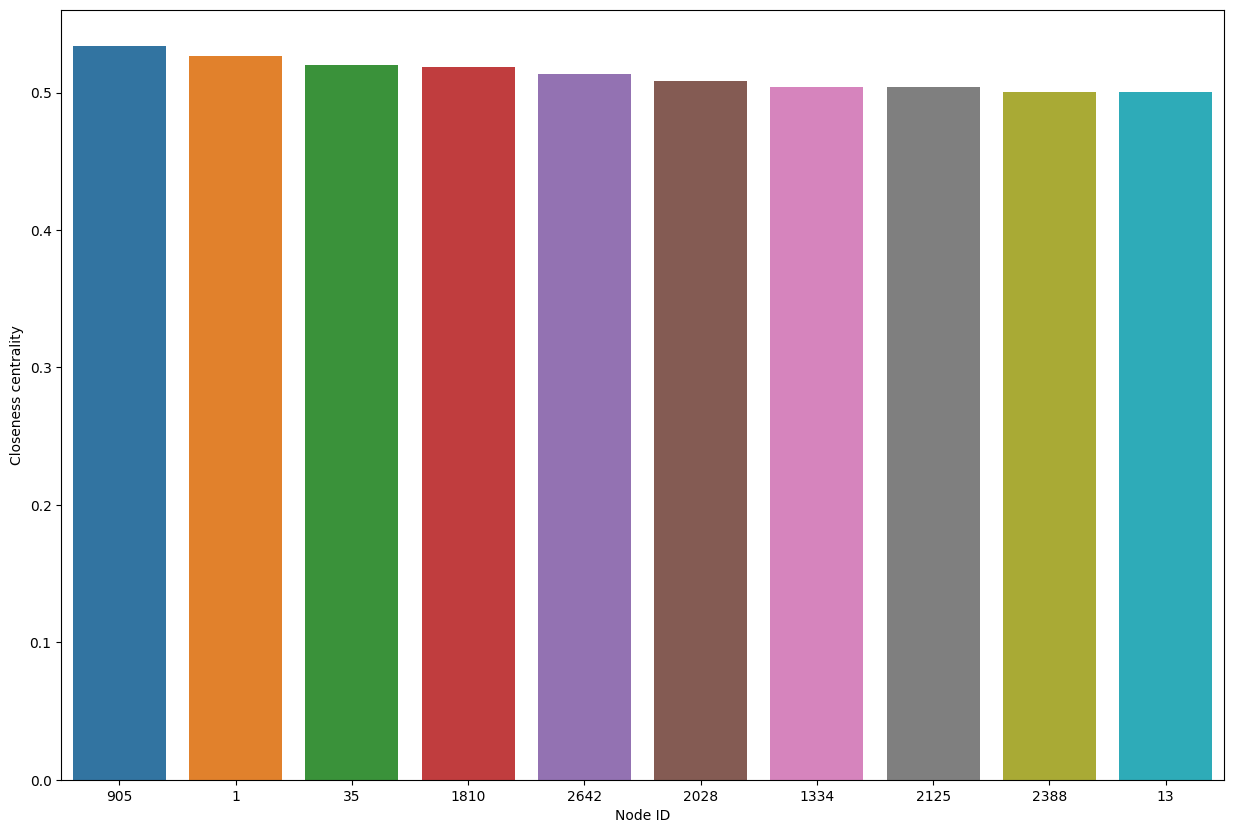

In [13]:
clos = nx.closeness_centrality(graph2)
d = {'Node ID':list(clos.keys()),'Closeness centrality':list(clos.values())}
df = pd.DataFrame(data = d)
plt.figure(figsize=(15,10))
d= df.nlargest(10, 'Closeness centrality')
plot_order = d.groupby('Node ID')['Closeness centrality'].sum().sort_values(ascending=False).index.values
sns.barplot(
    x='Node ID',
    y='Closeness centrality',
    data=d,
    order=plot_order
)

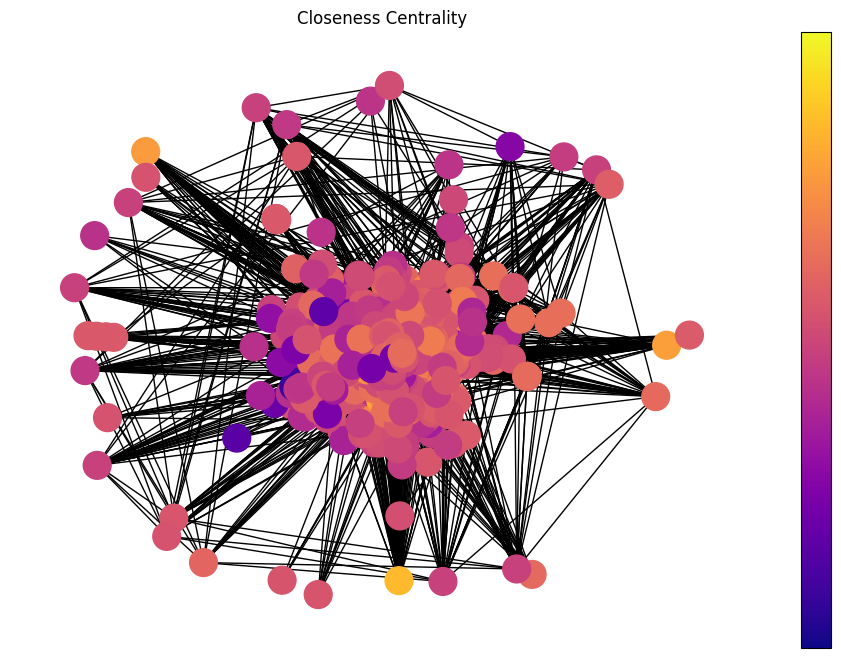

In [31]:
plt.figure(figsize=(12,8))
draw(graph2, pos, clos, 'Closeness Centrality')

<AxesSubplot: ylabel='Count'>

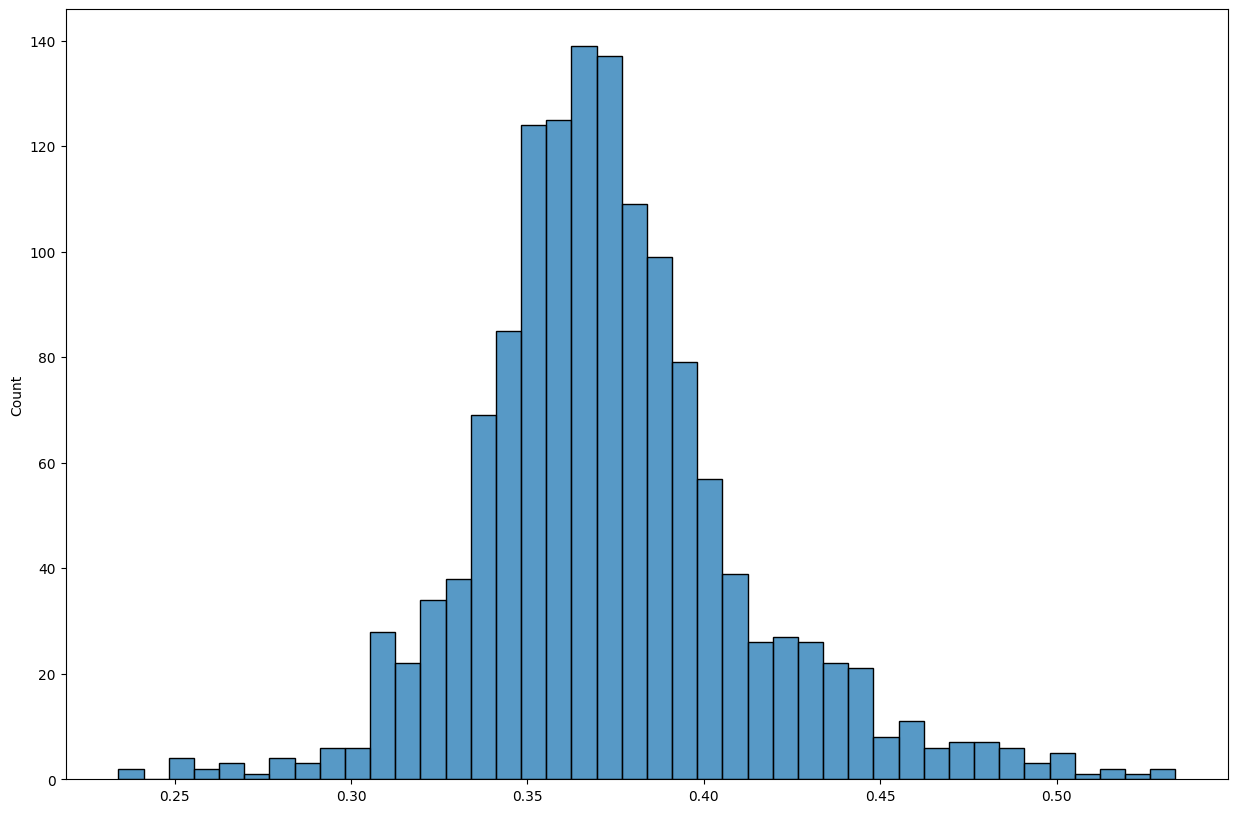

In [14]:
plt.figure(figsize=(15,10))
sns.histplot(list(clos.values()), kde=False)

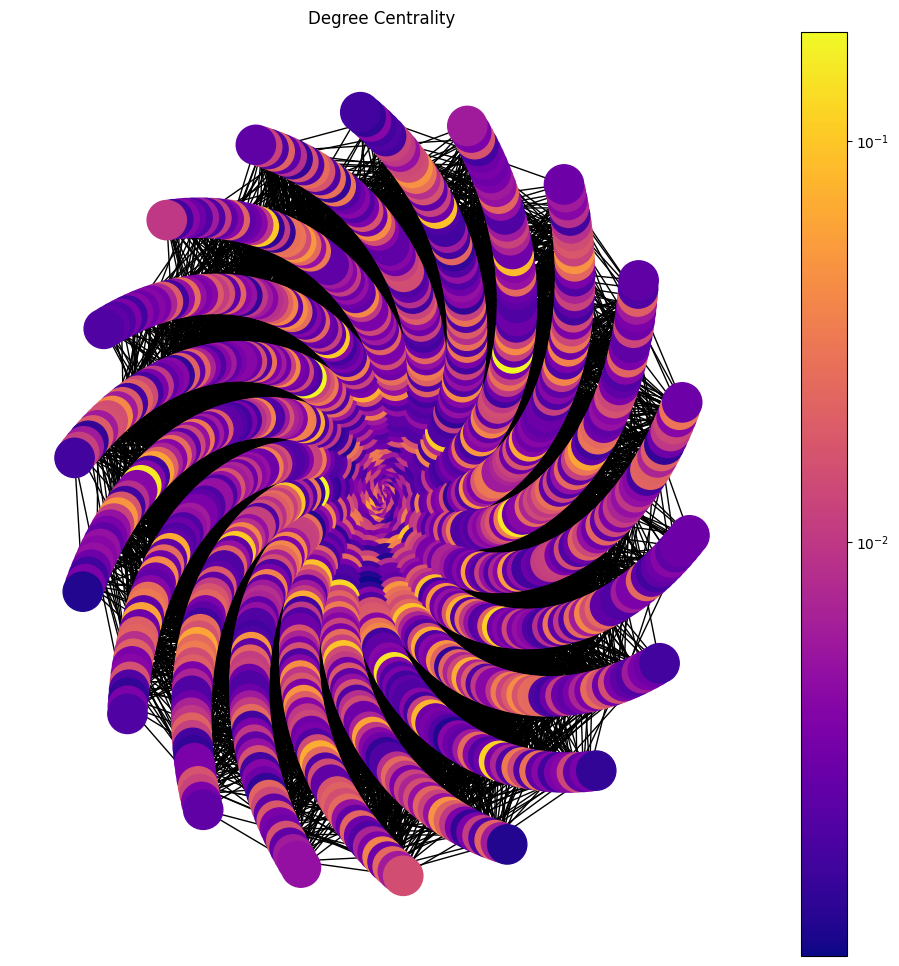

In [17]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph2)
draw(graph2, pos, degree, 'Degree Centrality')

<AxesSubplot: xlabel='Node ID', ylabel='Eigenvector centrality'>

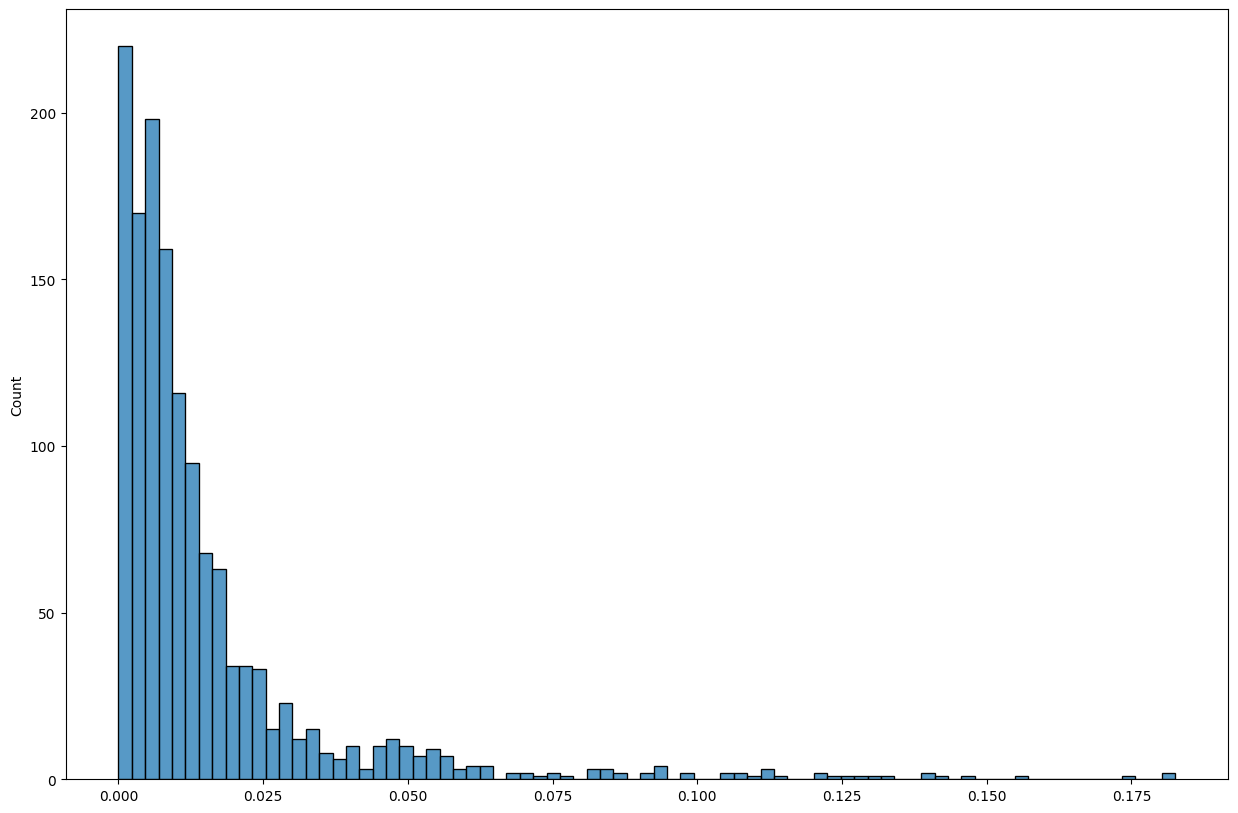

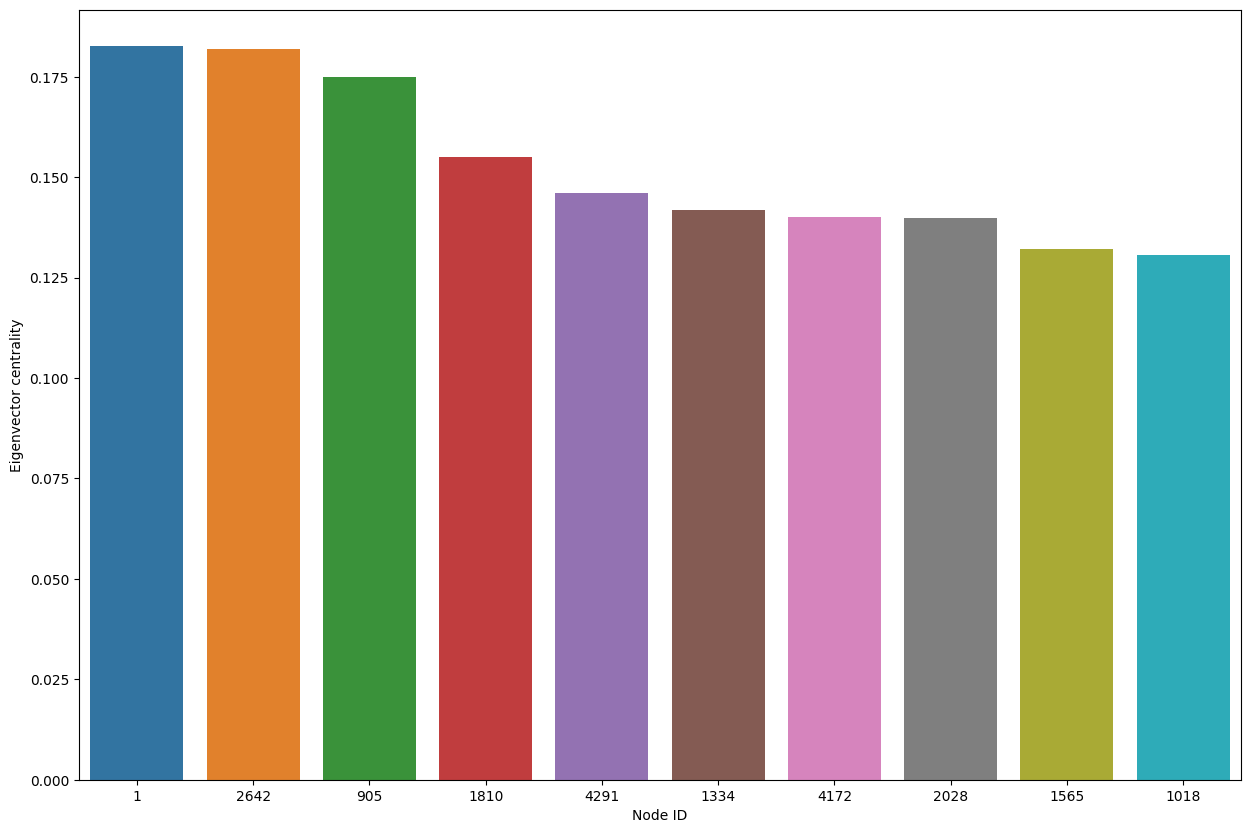

In [22]:
eig = nx.eigenvector_centrality(graph2,weight='weight')
plt.figure(figsize=(15,10))
sns.histplot(list(eig.values()), kde=False)
d = {'Node ID':list(eig.keys()),'Eigenvector centrality':list(eig.values())}
df = pd.DataFrame(data = d)
plt.figure(figsize=(15,10))
d= df.nlargest(10, 'Eigenvector centrality')
plot_order = d.groupby('Node ID')['Eigenvector centrality'].sum().sort_values(ascending=False).index.values
sns.barplot(
    x='Node ID',
    y='Eigenvector centrality',
    data=d,
    order=plot_order
)

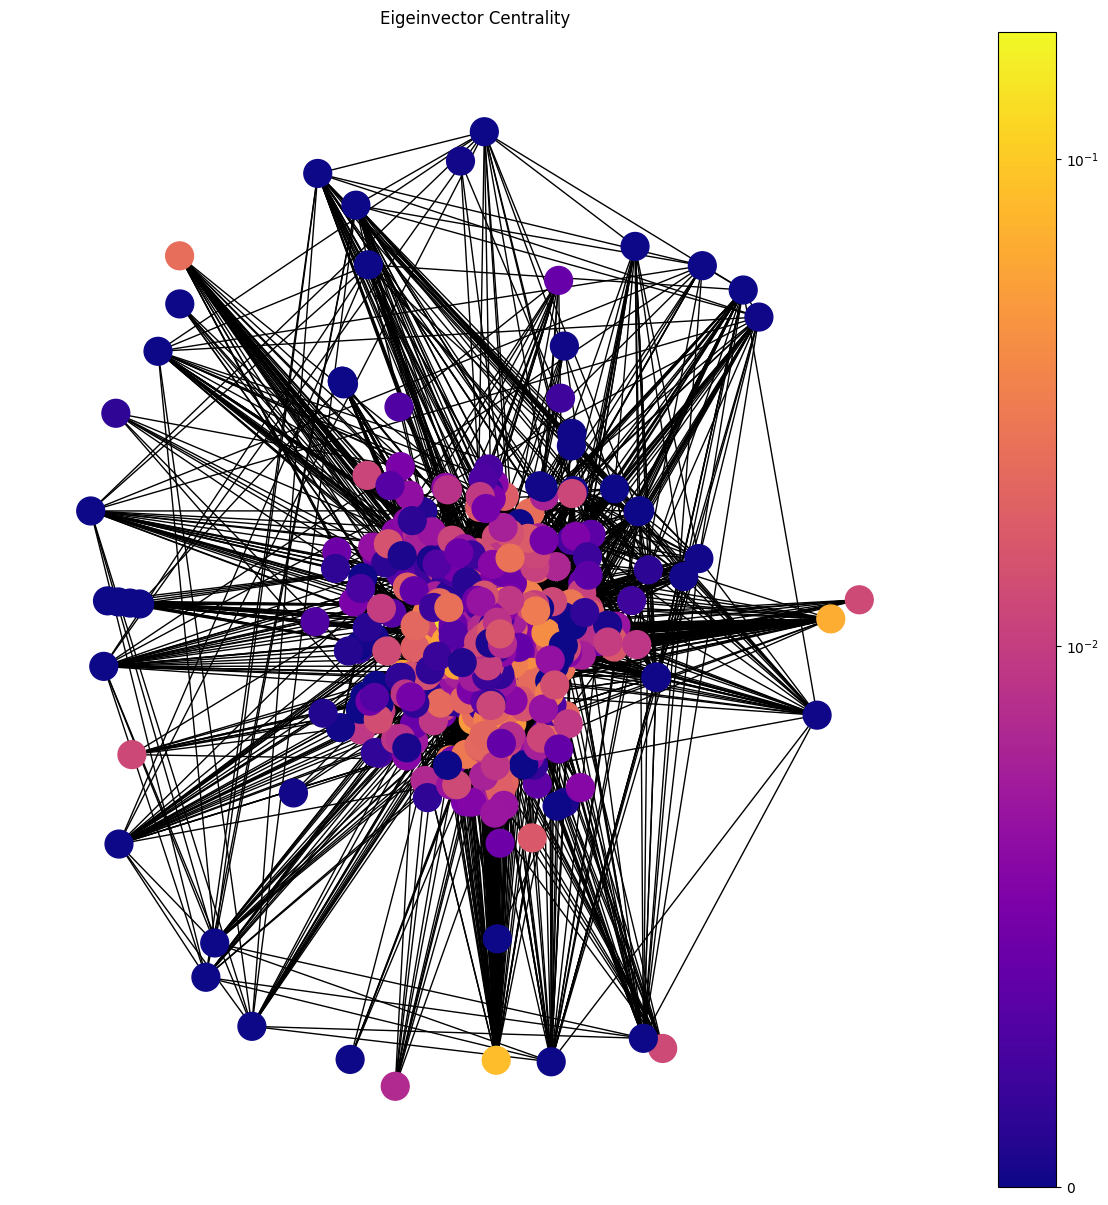

In [30]:
plt.figure(figsize=(15,15))
draw(graph2, pos, eig, 'Eigeinvector Centrality')

[[2, 1, 7, 132, 41, 202],
 [2, 1, 7, 132, 21],
 [2, 1, 7, 4, 3],
 [2, 1, 7, 4, 6, 13],
 [2, 1, 7, 4, 39],
 [2, 1, 7, 4, 41, 202],
 [2, 1, 7, 4, 41, 13],
 [2, 1, 7, 4, 62, 202],
 [2, 1, 7, 135, 202],
 [2, 1, 7, 135, 13, 6],
 [2, 1, 7, 779, 202],
 [2, 1, 7, 110, 41],
 [2, 1, 7, 20, 23],
 [2, 1, 7, 21, 3],
 [2, 1, 7, 21, 60],
 [2, 1, 7, 21, 39],
 [2, 1, 7, 54, 13],
 [2, 1, 7, 54, 62],
 [2, 1, 7, 60, 41, 202],
 [2, 1, 10, 21, 3],
 [2, 1, 10, 13, 41],
 [2, 1, 10, 13, 6],
 [2, 1, 3722, 1363, 135],
 [2, 1, 3722, 115, 62],
 [2, 1, 77, 6],
 [2, 1, 77, 39, 115],
 [2, 1, 77, 39, 21],
 [2, 1, 77, 20, 61],
 [2, 1, 77, 20, 23],
 [2, 1, 77, 60, 21],
 [2, 1, 178, 1363, 135],
 [2, 1, 178, 60],
 [2, 1, 1363, 135, 245],
 [2, 1, 1363, 135, 6],
 [2, 1, 1363, 135, 223],
 [2, 1, 115, 3],
 [2, 1, 245, 39],
 [2, 1, 61, 4],
 [2, 1, 223, 60],
 [2, 1, 223, 39],
 [2, 516, 13],
 [2, 651],
 [2, 523, 634],
 [2, 523, 654],
 [2, 654, 832, 13],
 [2, 142, 7, 132],
 [2, 142, 7, 110],
 [2, 142, 7, 60],
 [2, 401],
 [2, 658]

In [ ]:
nx.number_of_cliques(graph2)

In [76]:
nx.graph_clique_number(graph2)

11

In [59]:

plt.figure(figsize=(15,10))
#sns.histplot(len(list(f)), kde=False)
# d = {'Node ID':list(eig.keys()),'Eigenvector centrality':list(eig.values())}
# df = pd.DataFrame(data = d)
# plt.figure(figsize=(15,10))
# d= df.nlargest(10, 'Eigenvector centrality')
# plot_order = d.groupby('Node ID')['Eigenvector centrality'].sum().sort_values(ascending=False).index.values
# sns.barplot(
#     x='Node ID',
#     y='Eigenvector centrality',
#     data=d,
#     order=plot_order
# )

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [63]:
t = [[1,2,3],[1,2],[1,2,4]]
# r=[]
# for item in t:
#     r[len(item)] = r[len(item)] + 1
# r


{2: 1425,
 3: 2761,
 4: 2399,
 5: 2005,
 6: 1652,
 7: 1121,
 8: 645,
 9: 355,
 10: 68,
 11: 24}

<AxesSubplot: title={'center': 'Clique size distribution'}, xlabel='Clique Size', ylabel='Count'>

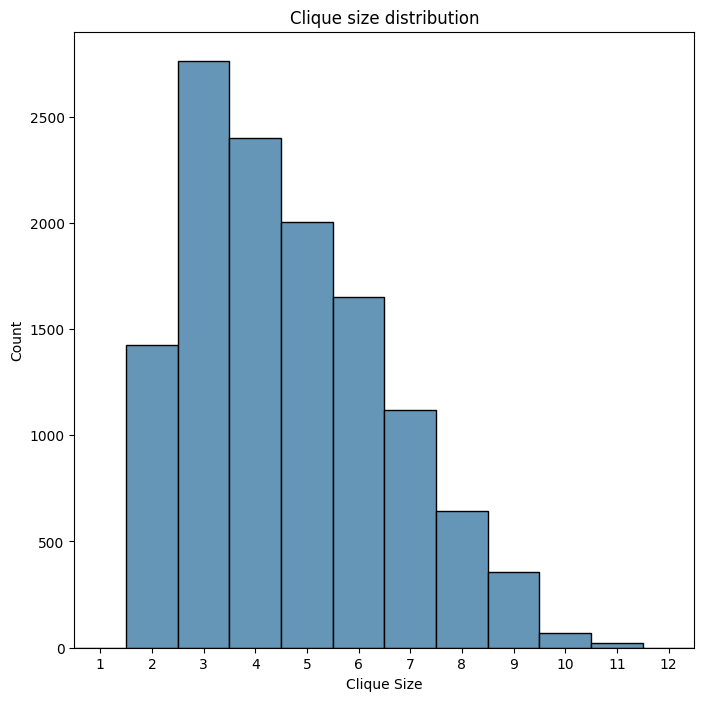

In [12]:
allclique = list(nx.find_cliques(graph2))
d = {1:0,2: 0,3: 0, 4: 0,5: 0, 6: 0,7: 0, 8: 0,9: 0, 10: 0,11: 0,12:0}
for i in allclique:
    (d[len(i)]) += 1  
clique = {'Clique':list(d.keys()),'Count':list(d.values())}

plt.figure(figsize=(8,8))
plt.xlabel("Clique Size")
plt.ylabel("Count")
plt.title("Clique size distribution")
sns.barplot(
    x='Clique',
    y='Count',
    data=clique,
    width=1,
    color='#5799C6',
    edgecolor='black'
)

# Maximal Clique Example 

In [93]:
a = []

for i in allclique:
    if len(i) == 11:
        print(i)

[4635, 3897, 905, 4682, 4679, 4680, 4681, 4686, 4688, 4683, 4733]
[4635, 3897, 905, 4682, 4679, 4680, 4681, 4686, 4678, 4683, 4733]
[4635, 3897, 905, 2125, 4707, 4667, 4654, 4673, 4666, 4531, 4661]
[4635, 3897, 905, 2125, 4707, 4667, 4654, 4675, 4666, 4531, 4661]
[4635, 3897, 905, 2125, 4683, 4667, 4654, 4673, 4666, 4531, 4661]
[4635, 3897, 905, 2125, 4683, 4667, 4654, 4675, 4666, 4531, 4661]
[545, 1352, 3572, 3707, 5506, 1512, 3640, 1735, 5065, 5482, 4860]
[545, 1352, 3572, 3707, 5506, 1512, 3640, 1735, 3722, 5482, 4860]
[1810, 4682, 4680, 4681, 4679, 4683, 4686, 905, 4733, 4688, 3897]
[1810, 4682, 4680, 4681, 4679, 4683, 4686, 905, 4733, 4688, 1815]
[1810, 4682, 4680, 4681, 4679, 4683, 4686, 905, 4733, 4678, 3897]
[1810, 4682, 4680, 4681, 4679, 4683, 4686, 905, 4733, 4678, 1815]
[1810, 2125, 905, 1815, 4707, 4667, 4654, 4673, 4666, 4531, 4661]
[1810, 2125, 905, 1815, 4707, 4667, 4654, 4675, 4666, 4531, 4661]
[1810, 2125, 905, 1815, 4683, 4667, 4654, 4673, 4666, 4531, 4661]
[1810, 212

[4635, 3897, 905, 4682, 4679, 4680, 4681, 4686, 4688, 4683, 4733]


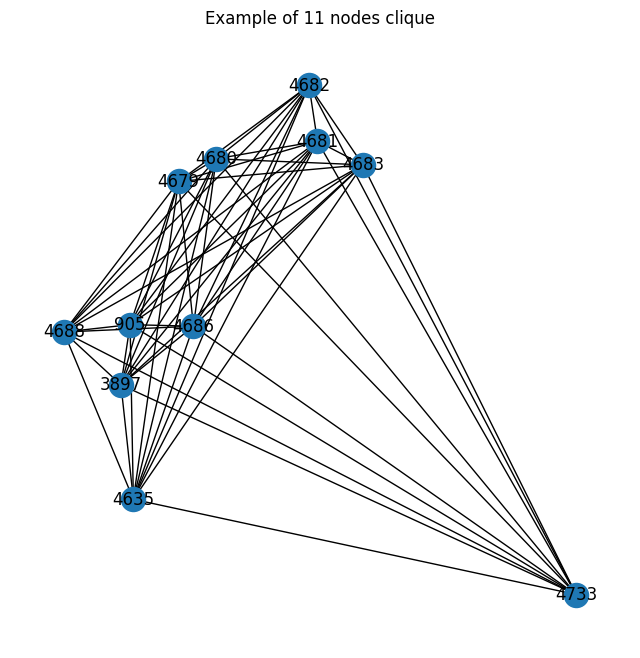

In [95]:
a = []

for i in allclique:
    if len(i) == 11:
        print(i)
        a = i
        break
g = graph2.subgraph(a)
plt.figure(figsize=(8,8))
plt.title('Example of 11 nodes clique')
nx.draw(g,pos,with_labels=True)
plt.show()

In [34]:
#nlist = [1,1810,905,35,2642,2028,1334,2125,2388,13]
nlist = [7,20,206,70,100,540,21,200,39,80] 
for i in nlist:
    for j in nlist:
        print(nx.shortest_path(graph2, source=i, target=j))
       

[7]
[7, 20]
[7, 206]
[7, 35, 70]
[7, 100]
[7, 540]
[7, 21]
[7, 200]
[7, 39]
[7, 80]
[20, 7]
[20]
[20, 7, 206]
[20, 1, 15, 70]
[20, 1, 100]
[20, 1, 540]
[20, 1, 21]
[20, 7, 200]
[20, 1, 39]
[20, 1, 80]
[206, 7]
[206, 7, 20]
[206]
[206, 7, 35, 70]
[206, 7, 100]
[206, 7, 540]
[206, 7, 21]
[206, 7, 200]
[206, 7, 39]
[206, 7, 80]
[70, 35, 7]
[70, 15, 1, 20]
[70, 35, 7, 206]
[70]
[70, 15, 1, 100]
[70, 41, 540]
[70, 15, 1, 21]
[70, 35, 7, 200]
[70, 15, 1, 39]
[70, 15, 1, 80]
[100, 7]
[100, 1, 20]
[100, 7, 206]
[100, 1, 15, 70]
[100]
[100, 1, 540]
[100, 1, 21]
[100, 7, 200]
[100, 1, 39]
[100, 1, 80]
[540, 7]
[540, 1, 20]
[540, 7, 206]
[540, 41, 70]
[540, 1, 100]
[540]
[540, 1, 21]
[540, 7, 200]
[540, 1, 39]
[540, 1, 80]
[21, 7]
[21, 1, 20]
[21, 7, 206]
[21, 1, 15, 70]
[21, 1, 100]
[21, 1, 540]
[21]
[21, 7, 200]
[21, 39]
[21, 1, 80]
[200, 7]
[200, 7, 20]
[200, 7, 206]
[200, 7, 35, 70]
[200, 7, 100]
[200, 7, 540]
[200, 7, 21]
[200]
[200, 7, 39]
[200, 7, 80]
[39, 7]
[39, 1, 20]
[39, 7, 206]
[39, 

In [16]:
print(nx.average_shortest_path_length(graph2))

2.7074241817378892


In [17]:
print(nx.diameter(graph2))

6


# Longest Path of the network 707->1062

In [46]:
print(nx.shortest_path(graph2, source=707,target=1062))

[707, 570, 563, 1, 36, 678, 1062]


# Neighbors

In [11]:
topdegree = [1810,905,2642,35,4172,1,2028,2125,1334,13]
degreelist = {}
for item in topdegree:
    degreelist[item] = len(list(nx.all_neighbors(graph2,item)))
    #print(len(list(nx.all_neighbors(graph2,item))))
degreelist    

{1810: 260,
 905: 258,
 2642: 251,
 35: 249,
 4172: 213,
 1: 211,
 2028: 207,
 2125: 207,
 1334: 170,
 13: 163}

<AxesSubplot: title={'center': 'Top 10 Degree'}, xlabel='Node ID', ylabel='Degree'>

<Figure size 1500x1000 with 0 Axes>

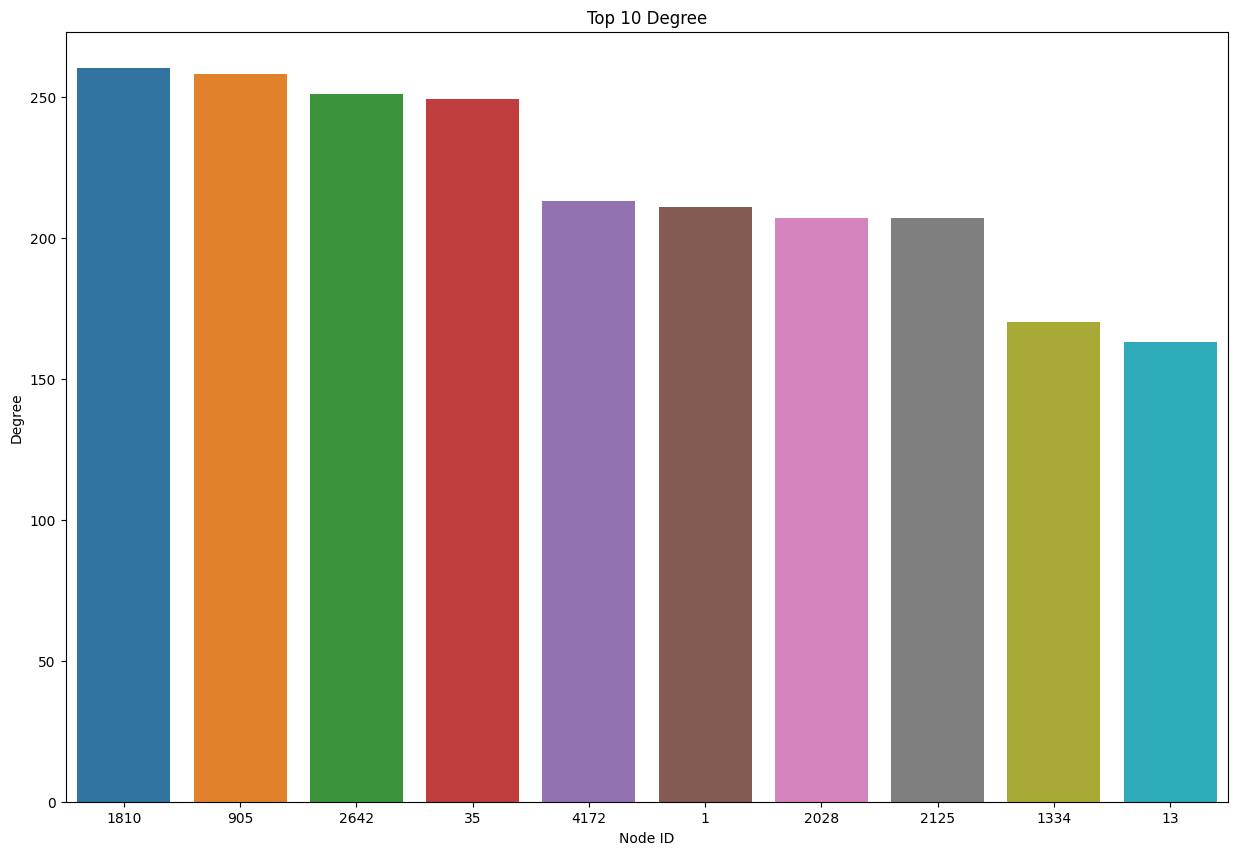

In [14]:

plt.figure(figsize=(15,10))
d = {'Node ID':list(degreelist.keys()),'Degree':list(degreelist.values())}
d = pd.DataFrame(data = d)
plot_order = d.groupby('Node ID')['Degree'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=(15,10))
plt.xlabel("Node ID")
plt.ylabel("Degree")
plt.title("Top 10 Degree")
sns.barplot(
    x='Node ID',
    y='Degree',
    data=d,
    order=plot_order
)

In [20]:
import random
rand = random.sample(list(graph2.nodes), 10)
rand

[1690, 4525, 820, 4002, 1948, 2725, 2535, 274, 2589, 1735]

In [77]:
degreelist = {}
for item in rand:
    degreelist[item] = len(list(nx.all_neighbors(graph2,item)))
    #print(len(list(nx.all_neighbors(graph2,item))))
degreelist


{206: 11,
 4675: 27,
 4525: 5,
 1815: 50,
 2592: 5,
 4284: 17,
 3547: 9,
 4673: 29,
 3791: 34,
 223: 11}

<AxesSubplot: title={'center': 'Random 10 Degree'}, xlabel='Node ID', ylabel='Degree'>

<Figure size 1500x1000 with 0 Axes>

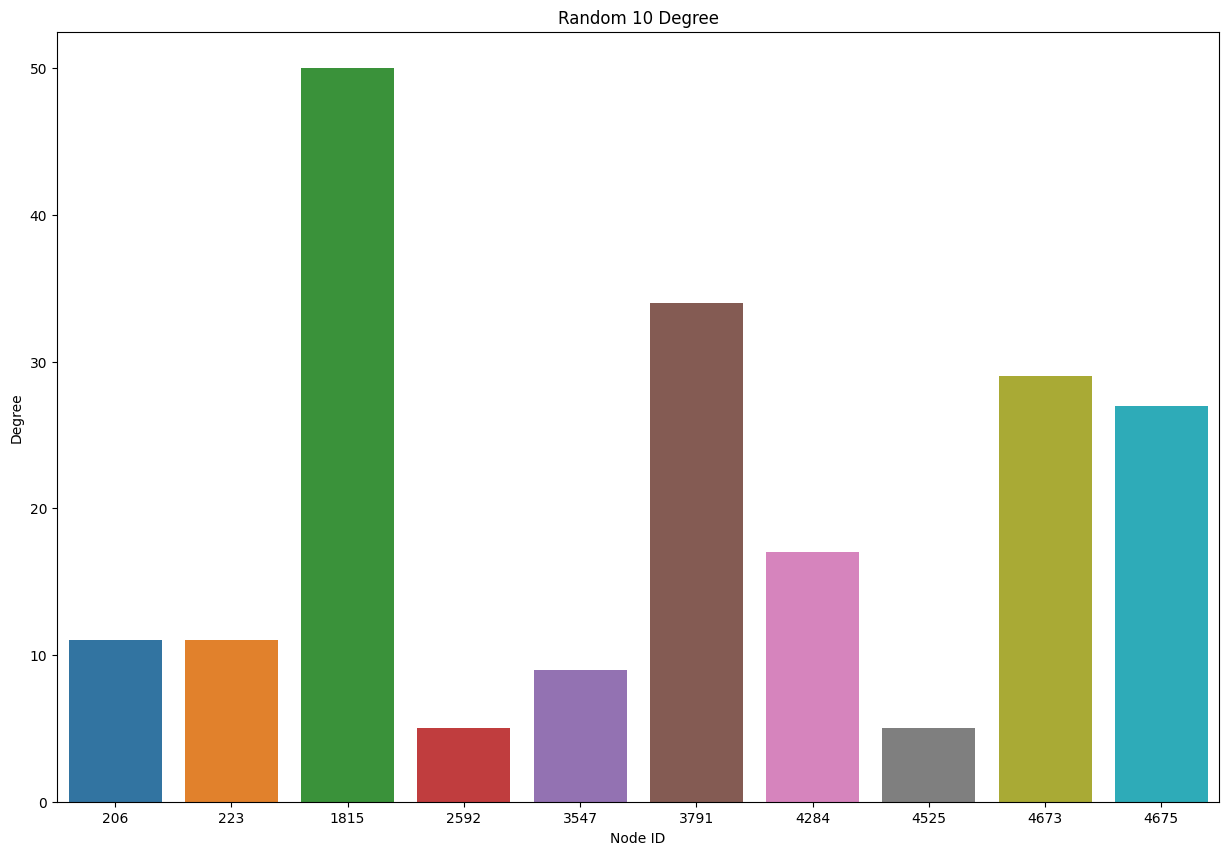

In [79]:
plt.figure(figsize=(15,10))
d = {'Node ID':list(degreelist.keys()),'Degree':list(degreelist.values())}

plt.figure(figsize=(15,10))
plt.xlabel("Node ID")
plt.ylabel("Degree")
plt.title("Random 10 Degree")
sns.barplot(
    x='Node ID',
    y='Degree',
    data=d
)

In [10]:
ego1 = nx.ego_graph(graph2, 1, radius=1, center=True, undirected=True, distance=None)
ego905 = nx.ego_graph(graph2, 905, radius=1, center=True, undirected=True, distance=None)
ego1815 = nx.ego_graph(graph2, 1815, radius=1, center=True, undirected=True, distance=None)

In [11]:
pos = nx.spring_layout(graph, k=0.20, iterations=20)

In [12]:
postest = nx.spring_layout(graph2, k=0.20, iterations=20,fixed=None,scale=8)

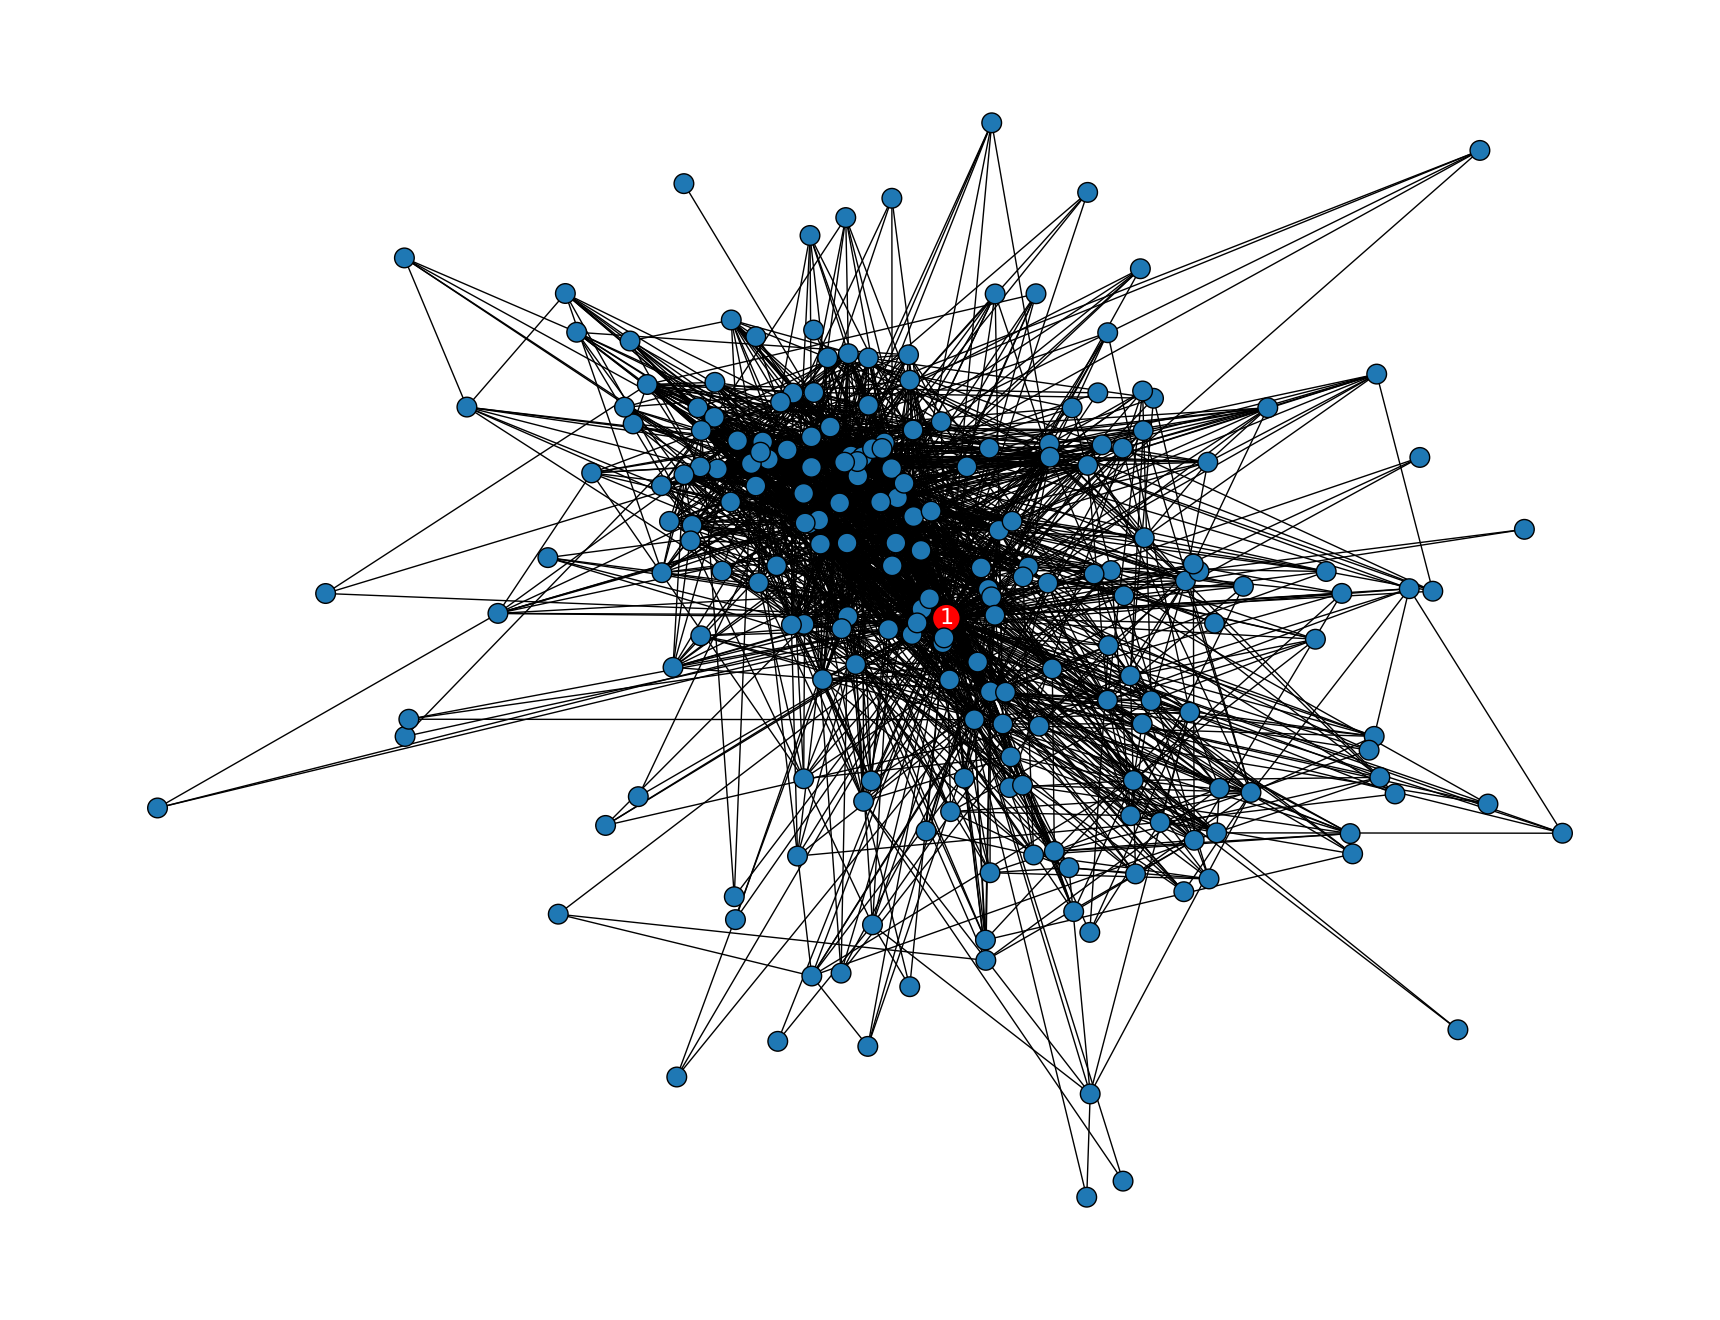

In [113]:
labels = {1:1}
size = []
color_map = []
for node in ego1:
    if node == 1:
        color_map.append('red')
        size.append(400)
    else: 
        color_map.append('#1F78B4')
        size.append(200)
plt.figure(figsize=(17,13))
nx.draw(ego1,postest,with_labels=False,node_size=size,node_color=color_map,edgecolors='black')
nx.draw_networkx_labels(ego,postest,labels,font_size=16,font_color='white')
plt.show()

In [30]:
print("Ego params for Node 1")
print("NODES: ", len(ego1.nodes))
print("EDGES: ", len(ego1.edges))
print("CLUSTERING: ", nx.average_clustering(ego1))
print("Density: ", nx.density(ego1))

Ego params for Node 1
NODES:  212
EDGES:  1895
CLUSTERING:  0.49563623841836185
Density:  0.0847268174908343


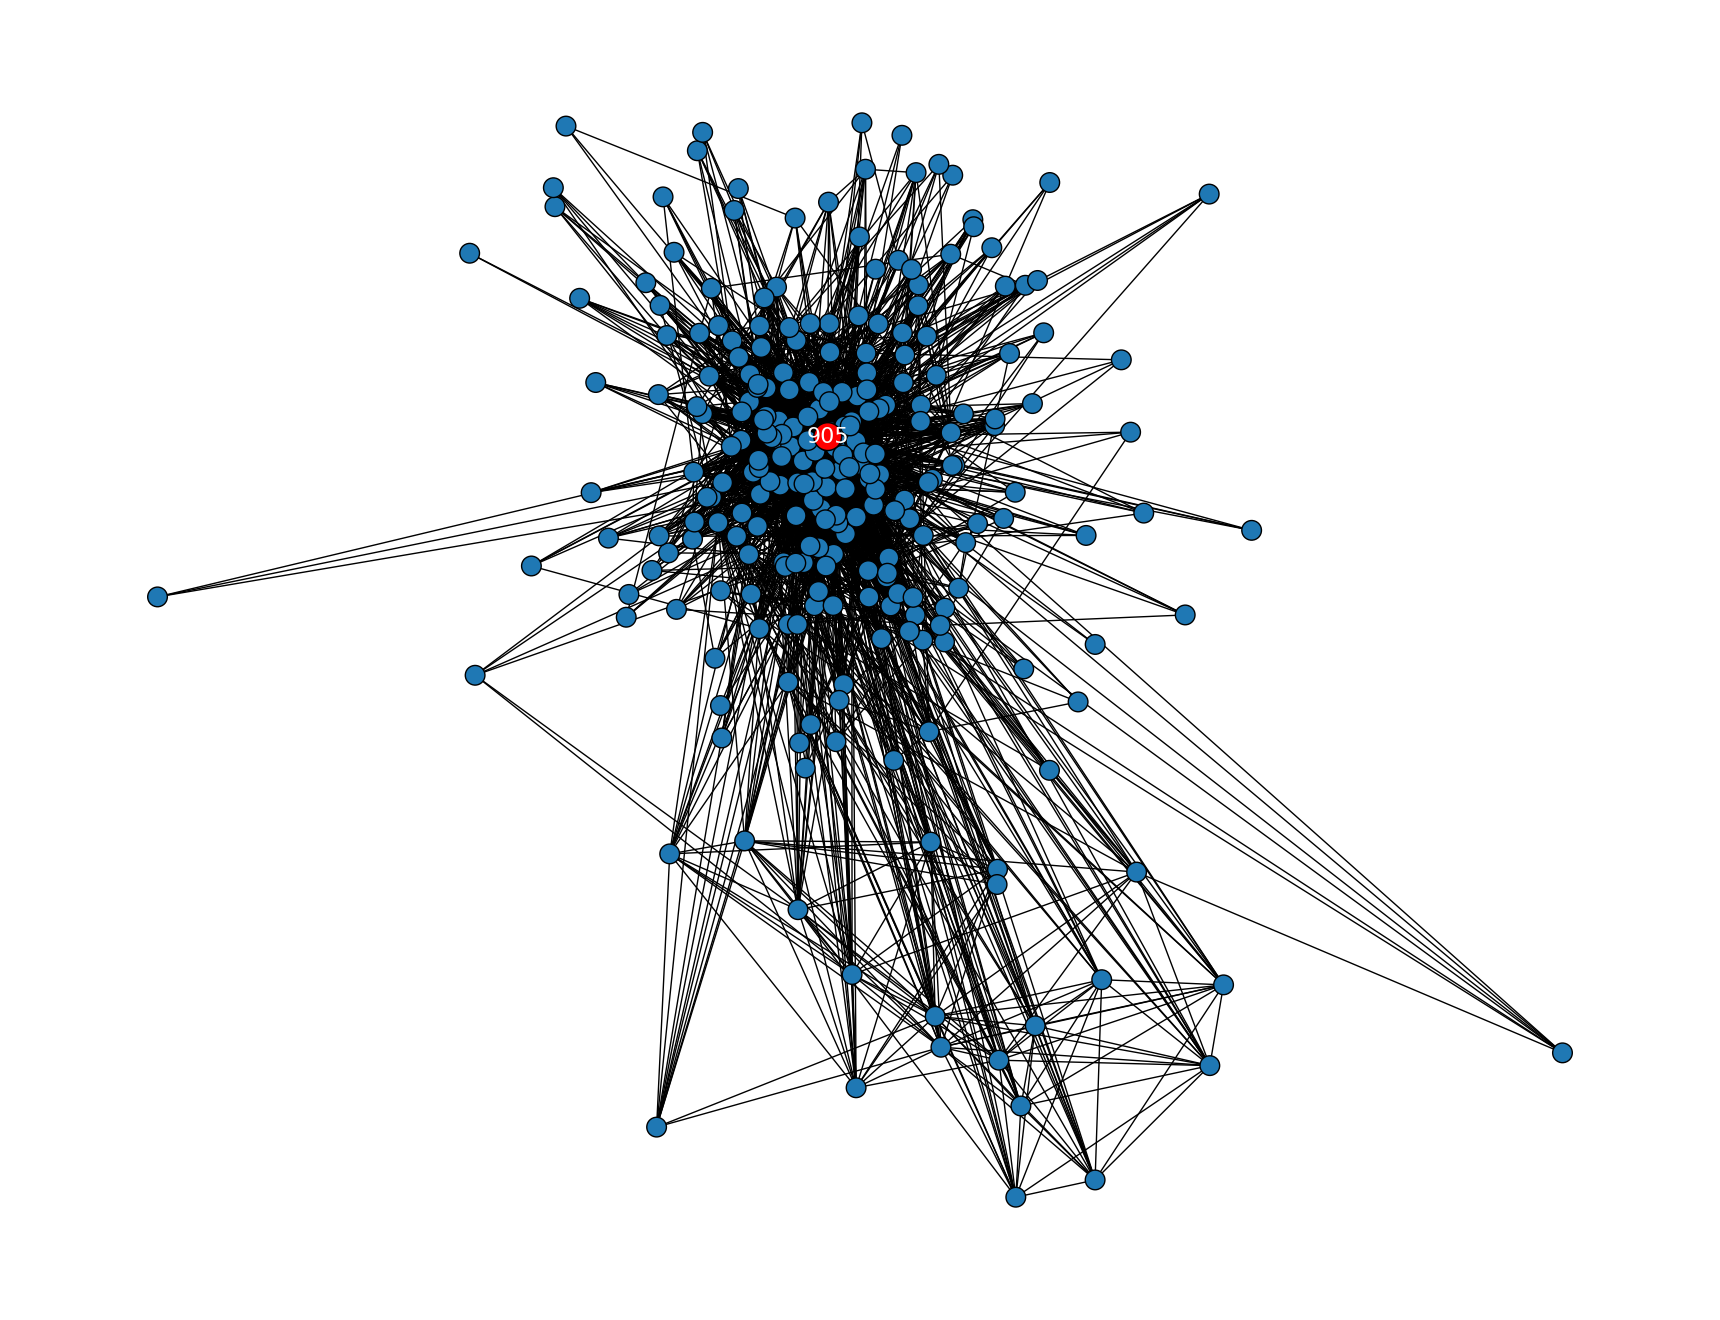

In [114]:
labels = {905:905}
size = []
color_map = []
for node in ego905:
    if node == 905:
        color_map.append('red')
        size.append(400)
    else: 
        color_map.append('#1F78B4')
        size.append(200)
plt.figure(figsize=(17,13))
nx.draw(ego905,postest,with_labels=False,node_size=size,node_color=color_map,edgecolors='black')
nx.draw_networkx_labels(ego,postest,labels,font_size=16,font_color='white')
plt.show()

In [31]:
print("Ego params for Node 905")
print("NODES: ", len(ego905.nodes))
print("EDGES: ", len(ego905.edges))
print("CLUSTERING: ", nx.average_clustering(ego905))
print("Density: ", nx.density(ego905))

Ego params for Node 905
NODES:  259
EDGES:  2675
CLUSTERING:  0.5252969169657588
Density:  0.08006345215647541


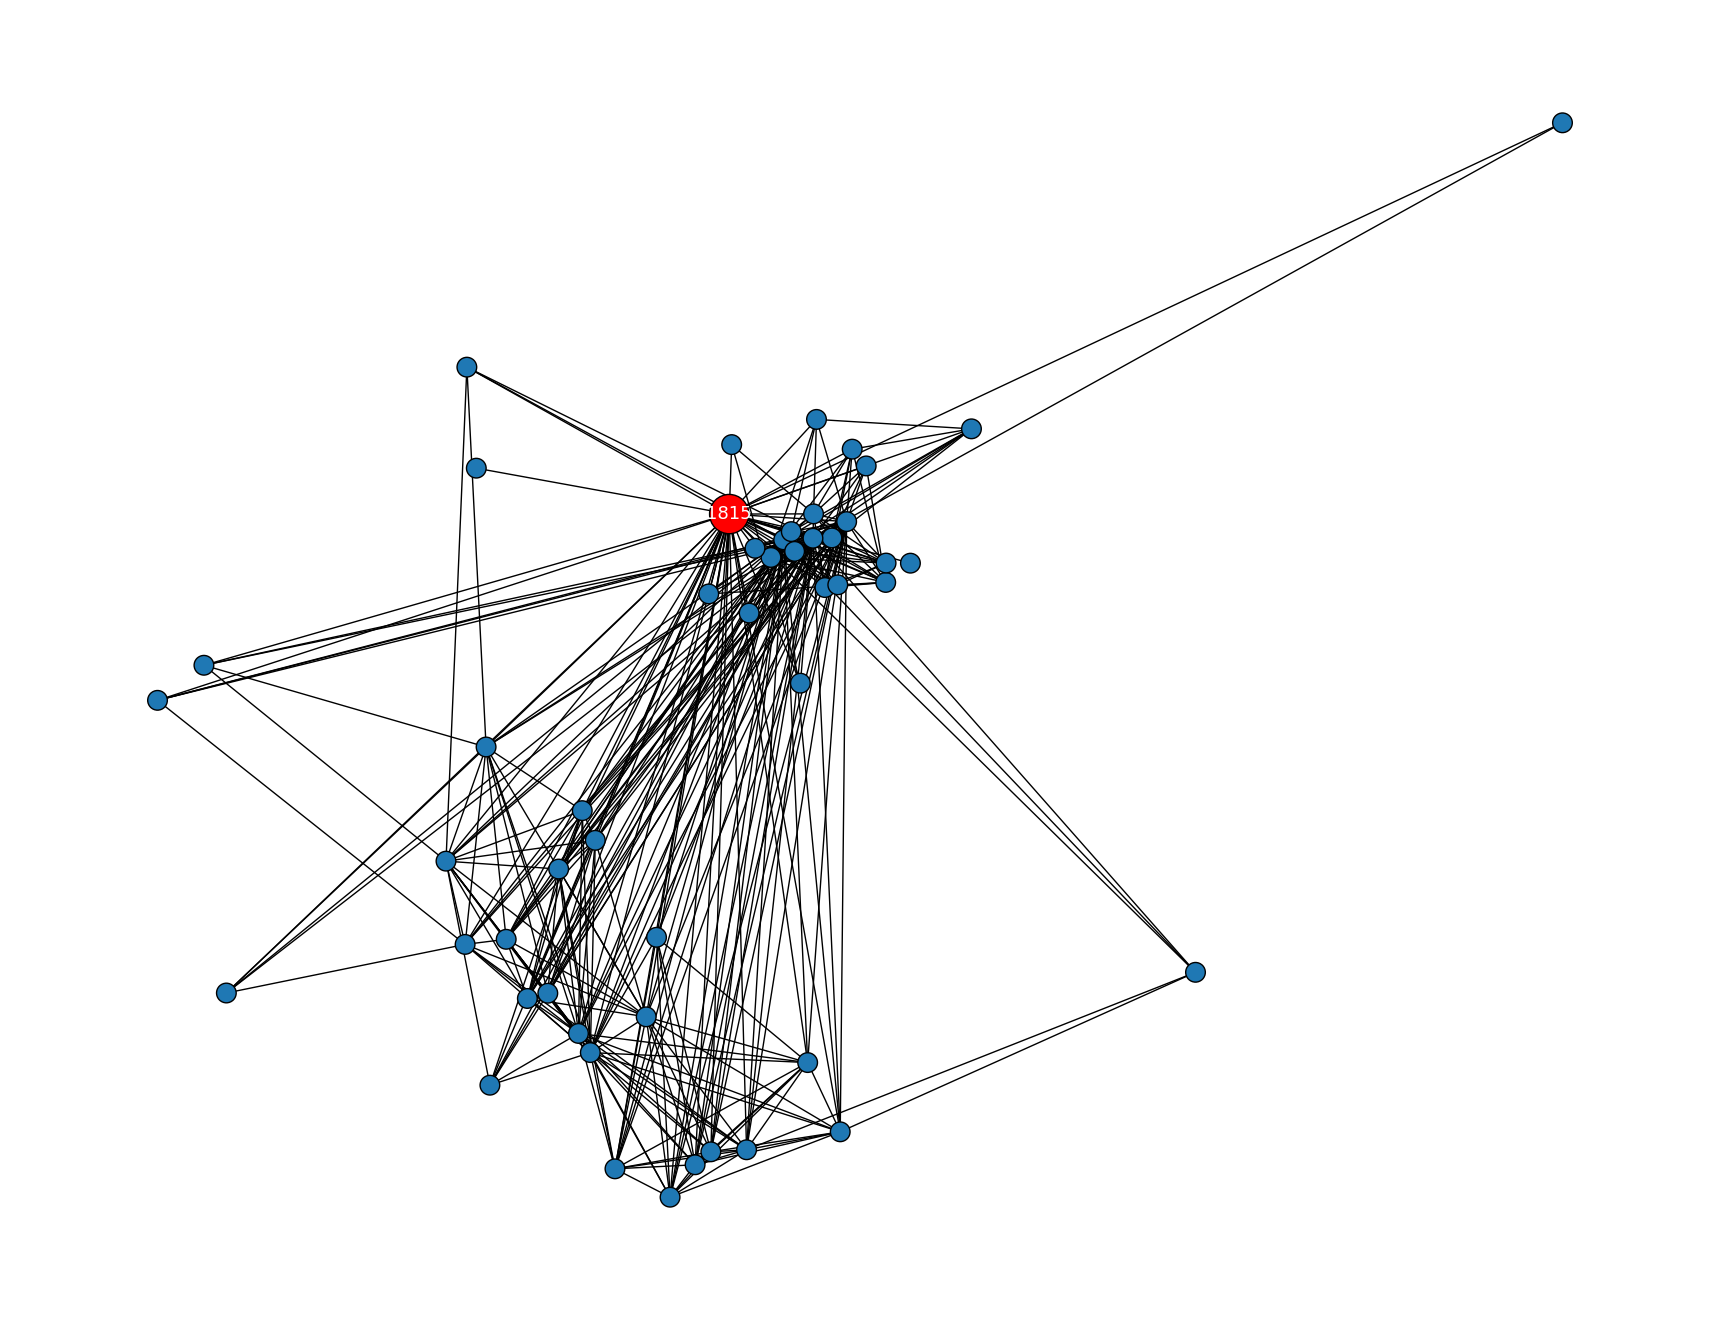

In [26]:
labels = {1815:1815}
size = []
color_map = []
for node in ego1815:
    if node == 1815:
        color_map.append('red')
        size.append(800)
    else: 
        color_map.append('#1F78B4')
        size.append(200)
plt.figure(figsize=(17,13))
nx.draw(ego1815,postest,with_labels=False,node_size=size,node_color=color_map,edgecolors='black')
nx.draw_networkx_labels(ego1815,postest,labels,font_size=13,font_color='white')
plt.show()

In [32]:
print("Ego params for Node 1815")
print("NODES: ", len(ego1815.nodes))
print("EDGES: ", len(ego1815.edges))
print("CLUSTERING: ", nx.average_clustering(ego1815))
print("Density: ", nx.density(ego1815))

Ego params for Node 1815
NODES:  51
EDGES:  319
CLUSTERING:  0.7473099737686962
Density:  0.25019607843137254
